# 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from glycowork.motif.draw import GlycoDraw
from glycowork.motif.analysis import get_pca

In [14]:
import pandas as pd
from glycowork.motif.analysis import get_differential_expression
from glycowork.motif.analysis import get_volcano
from glycowork.motif.draw import annotate_figure

In [35]:
data = {
    'Glycan': ['Gal(b1-3)GalNAc', 'GalOS(b1-3)GalNAc', 'Gal(b1-3)[Fuc(a1-?)]GalNAc', 'GlcNAc(b1-2)Man(a1-3)Man', 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc'],
    'Sample1': [1.1, 0.2, 0.3, 0.5, 0.7, 1.0, 0.6],
    'Sample2': [1.2, 0.1, 0.2, 0.4, 0.8, 0.9, 0.5],
    'Sample3': [0.1, 1.8, 1.9, 0.3, 0.6, 0.8, 1.2],
    'Sample4': [0.2, 1.1, 1.2, 0.2, 0.5, 0.7, 1.1],
    'Sample5': [1.3, 0.3, 0.4, 0.6, 0.9, 1.1, 0.7],
    'Sample6': [1.4, 0.4, 0.5, 0.7, 1.0, 1.2, 0.8],
    'Sample7': [0.3, 1.9, 2.0, 0.4, 0.7, 0.9, 1.3],
    'Sample8': [0.4, 1.2, 1.3, 0.3, 0.6, 0.8, 1.2]
}
differential_glycomics_df = pd.DataFrame(data)

# Define the groups
group1 = ['Sample1', 'Sample2', 'Sample5', 'Sample6']
group2 = ['Sample3', 'Sample4', 'Sample7', 'Sample8']

differential_expression = get_differential_expression(df = differential_glycomics_df,
                            group1 = group1,
                            group2 = group2,
                            motifs = True,
                            feature_set = ['exhaustive'],
                            paired = False,
                            min_samples = 0.1)

print(differential_expression)

You're working with an alpha of 0.0719947529118713 that has been adjusted for your sample size of 8.
                   Glycan  Mean abundance    Log2FC     p-val  corr p-val  \
1         Fuc(a1-?)GalNAc        3.467368  2.005893  0.000079    0.000079   
6         GlcNAc(b1-2)Man        5.017783 -0.815989  0.000079    0.000079   
5            Man(a1-3)Man        4.268561 -0.959186  0.000089    0.000089   
12                    Man       14.685441 -0.867365  0.000316    0.000316   
0       GalOS(b1-3)GalNAc        3.091417  2.560404  0.000340    0.000340   
8            Man(a1-?)Man        6.968110 -0.914016  0.000409    0.000409   
11                 GlcNAc       10.416880 -0.830419  0.000483    0.000483   
4   Terminal_LacNAc_type2        3.448771 -0.667992  0.001560    0.001560   
3              Chitobiose        2.699549 -0.842423  0.002063    0.002063   
10                 GalNAc       12.812363  0.659622  0.002641    0.002641   
2         Neu5Ac(a2-3)Gal        3.392162  0.670803 

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


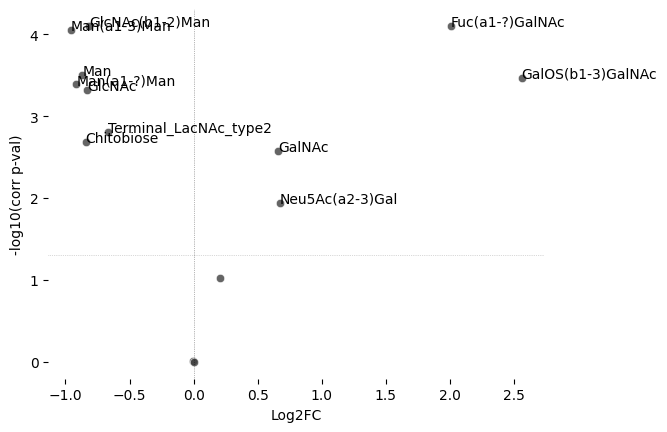

In [36]:
# Differential glycomics volcano plot
volcano = get_volcano(differential_expression,
                      y_thresh = 0.05,
                      annotate_volcano = True,
                      filepath = './volcano.svg')

In [32]:
annotate_figure('./volcano.svg',
               filepath = './volcano_annotated.pdf')

In [38]:
data = {
    'Glycan': [
        'Gal(b1-3)GalNAc', 'GalOS(b1-3)GalNAc', 'Gal(b1-3)[Fuc(a1-?)]GalNAc',
        'GlcNAc(b1-2)Man(a1-3)Man', 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
        'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man', 'Neu5Ac(a2-3)Gal(b1-3)GalNAc'
    ],
    'Sample1': [1.0, 0.5, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample2': [1.1, 0.6, 0.4, 0.5, 0.7, 0.8, 0.6],
    'Sample3': [1.0, 0.5, 0.6, 0.7, 0.9, 1.0, 0.8],
    'Sample4': [1.1, 0.6, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample5': [1.0, 0.5, 0.5, 0.6, 0.8, 0.9, 0.7],
    'Sample6': [1.1, 0.6, 0.4, 0.5, 0.7, 0.8, 0.6],
    'Sample7': [1.0, 0.5, 0.6, 0.7, 0.9, 1.0, 0.8],
    'Sample8': [1.1, 0.6, 0.5, 0.6, 0.8, 0.9, 0.7]
}
differential_glycomics_df_nonsignificant = pd.DataFrame(data)

# Define the groups
group1 = ['Sample1', 'Sample2', 'Sample5', 'Sample6']
group2 = ['Sample3', 'Sample4', 'Sample7', 'Sample8']

differential_expression_nonsignificant = get_differential_expression(differential_glycomics_df_nonsignificant,
                            group1 = group1,
                            group2 = group2,
                            motifs = True,
                            feature_set = ['exhaustive'],
                            paired = False,
                            min_samples = 0.1)

print(differential_expression_nonsignificant)

You're working with an alpha of 0.0719947529118713 that has been adjusted for your sample size of 8.
                   Glycan  Mean abundance    Log2FC     p-val  corr p-val  \
0       GalOS(b1-3)GalNAc        2.140993 -0.182216  0.322471    0.322471   
1         Fuc(a1-?)GalNAc        0.000000  0.000000  1.000000    1.000000   
2         Neu5Ac(a2-3)Gal        0.000000  0.000000  1.000000    1.000000   
3              Chitobiose        0.000000  0.000000  1.000000    1.000000   
4   Terminal_LacNAc_type2        0.000000  0.000000  1.000000    1.000000   
5            Man(a1-3)Man        0.000000  0.000000  1.000000    1.000000   
6         GlcNAc(b1-2)Man        0.000000  0.000000  1.000000    1.000000   
7         Neu5Ac(a2-?)Gal        0.000000  0.000000  1.000000    1.000000   
8            Man(a1-?)Man        0.000000  0.000000  1.000000    1.000000   
9           Oglycan_core1        0.000000  0.000000  1.000000    1.000000   
10                 GalNAc        0.000000  0.000000 

You're working with a default alpha of 0.05. Set sample size (n = ...) for Bayesian-Adaptive Alpha Adjustment


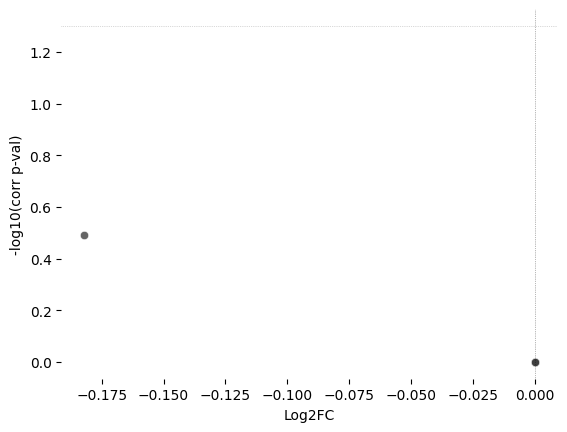

In [44]:
# Differential glycomics volcano plot
volcano_nonsignificant = get_volcano(differential_expression_nonsignificant,
           annotate_volcano = True,
                     filepath = './volcano_nonsignificant.svg',
                     y_thresh = 0.05)

In [45]:
annotate_figure('./volcano_nonsignificant.svg',
               filepath = './volcano_nonsignificant.pdf')